# General info

In [1]:
import pandas as pd
train_df = pd.read_csv("train.csv")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [2]:
train_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [3]:
train_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


# categorical columns

In [4]:
# train_df.groupby(['occupation', 'workclass']).size()
for column in list(train_df.select_dtypes(include='object')):
    print(column, ':  ', train_df[column].unique(), '\n')

workclass :   ['Private' 'State-gov' 'Self-emp-not-inc' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' nan 'Never-worked' 'Without-pay'] 

education :   ['Doctorate' '12th' 'Bachelors' '7th-8th' 'Some-college' 'HS-grad' '9th'
 '10th' '11th' 'Masters' 'Preschool' '5th-6th' 'Prof-school' 'Assoc-voc'
 '1st-4th' 'Assoc-acdm'] 

marital-status :   ['Divorced' 'Never-married' 'Married-civ-spouse' 'Widowed' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] 

occupation :   ['Exec-managerial' 'Other-service' 'Transport-moving' 'Adm-clerical'
 'Machine-op-inspct' 'Sales' 'Handlers-cleaners' 'Farming-fishing'
 'Protective-serv' 'Prof-specialty' 'Craft-repair' nan 'Tech-support'
 'Priv-house-serv' 'Armed-Forces'] 

relationship :   ['Not-in-family' 'Own-child' 'Husband' 'Wife' 'Unmarried' 'Other-relative'] 

race :   ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'] 

gender :   ['Male' 'Female'] 

native-country :   ['United-States' 'Japan' 'South' 'Portugal' 'Italy' 'Mexico

# Analyzing unknown data

In [5]:
train_df.isna().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [6]:
train_df.isna().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [7]:
train_df[train_df.workclass.isna() & train_df.occupation.isna()].shape

(2498, 15)

#### most of missing data belongs to rows where both **workclass** and **occupation** are null

In [8]:
train_df[train_df.workclass.isna()]['income_>50K'].value_counts() / train_df['income_>50K'].value_counts()

0    0.067646
1    0.022438
Name: income_>50K, dtype: float64

##### and these are a small portion of dataset and not worth the time and effort to fix so we decide to remove them

In [9]:
train_df.dropna(inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40727 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              40727 non-null  int64 
 1   workclass        40727 non-null  object
 2   fnlwgt           40727 non-null  int64 
 3   education        40727 non-null  object
 4   educational-num  40727 non-null  int64 
 5   marital-status   40727 non-null  object
 6   occupation       40727 non-null  object
 7   relationship     40727 non-null  object
 8   race             40727 non-null  object
 9   gender           40727 non-null  object
 10  capital-gain     40727 non-null  int64 
 11  capital-loss     40727 non-null  int64 
 12  hours-per-week   40727 non-null  int64 
 13  native-country   40727 non-null  object
 14  income_>50K      40727 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


#### now with unusable data out of the way, we can visualize it to have a better understanding of what we're going to do

# data visualization

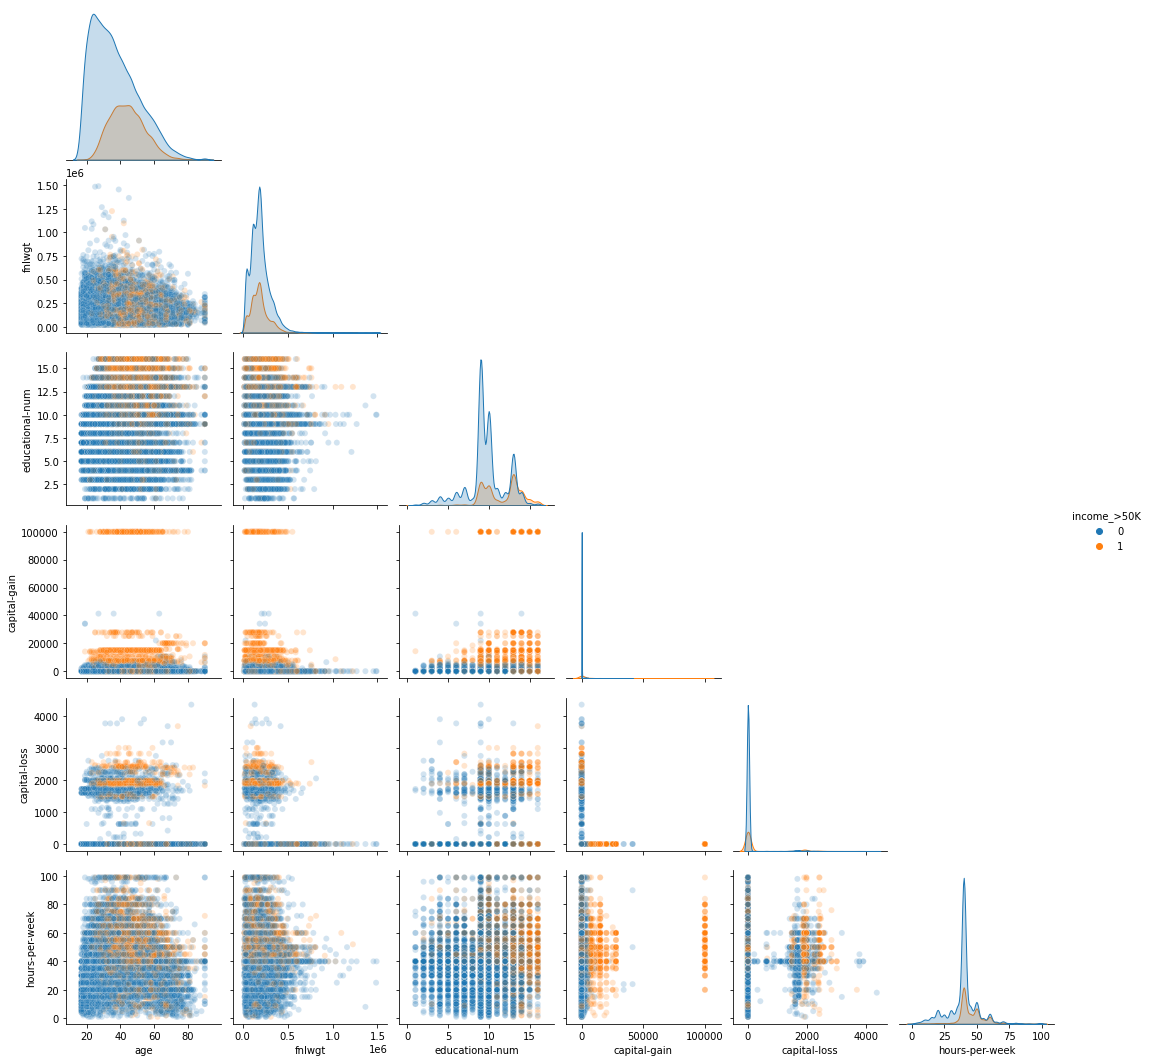

In [10]:
#importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(train_df,hue='income_>50K',corner=True, plot_kws={'alpha': 0.2})

<AxesSubplot:title={'center':'Correlation of numerical variables'}>

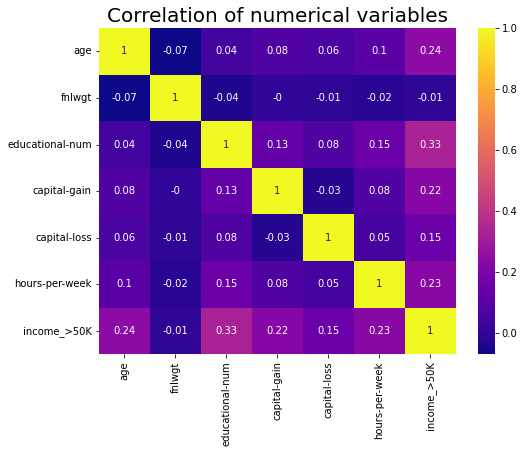

In [11]:

plt.figure(figsize = (8,6))
plt.title('Correlation of numerical variables', fontsize = 20)
sns.heatmap(train_df.corr(numeric_only=True).round(2), annot=True, cmap = 'plasma')

as you can see, fnlwgt column has almost zero correlation with all of the columns, which might be an indication that we'll have to drop that column

#### stacked bar chart for the income of different categorical features

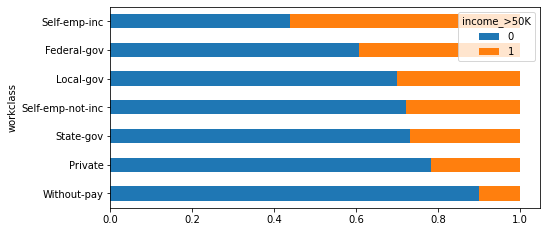

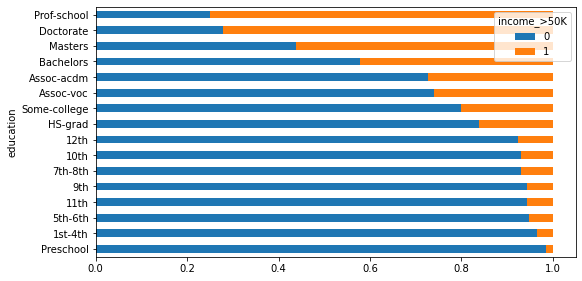

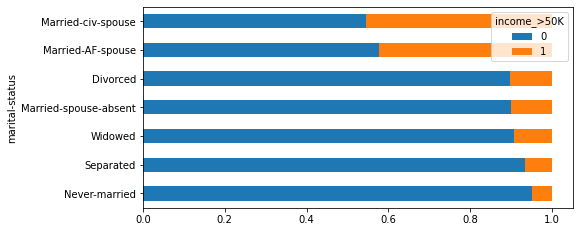

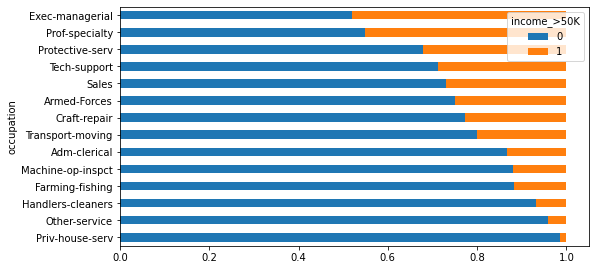

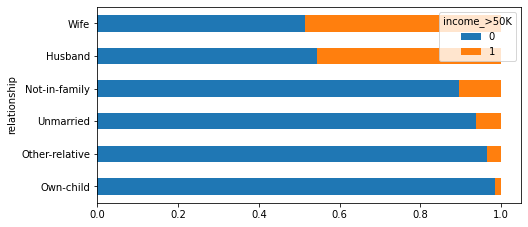

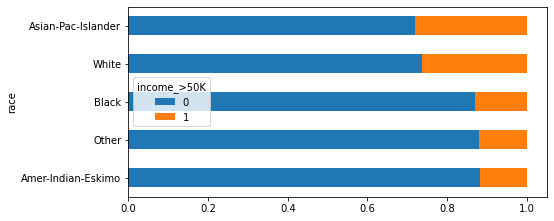

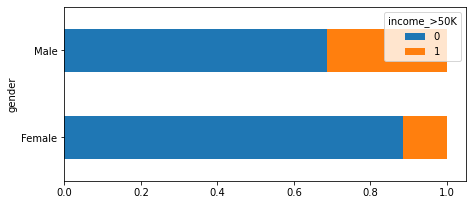

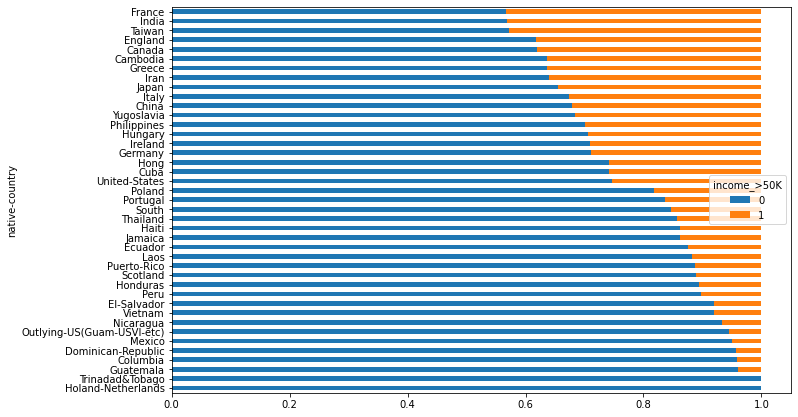

In [12]:
for a in train_df.select_dtypes(include=['object']):
    dist = pd.crosstab(train_df[a], train_df['income_>50K'])
    dist_norm = dist.div(dist.sum(axis=1),axis=0).sort_values(1)
    offset = len(train_df[a].unique())
    dist_norm.plot.barh(stacked=True,figsize=(7+0.1*offset,3+0.1*offset))

#### distribution of high income records between different ages

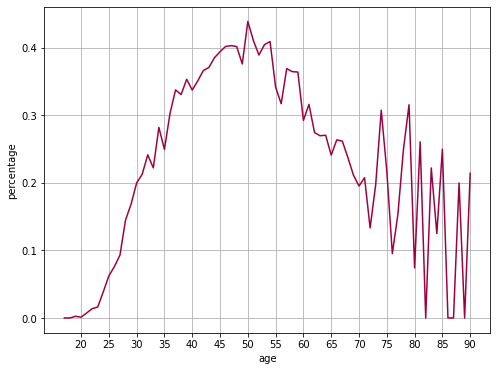

In [13]:
xticks = [i for i in range(20,91,5)]
age_dist = train_df[train_df['income_>50K'] == 1]['age'].value_counts().div(train_df['age'].value_counts(), fill_value=0)\
    .plot.line(ylabel='percentage', xlabel='age',cmap='Spectral',figsize=(8,6),xticks=xticks,grid=True)

#### hours of work per week  

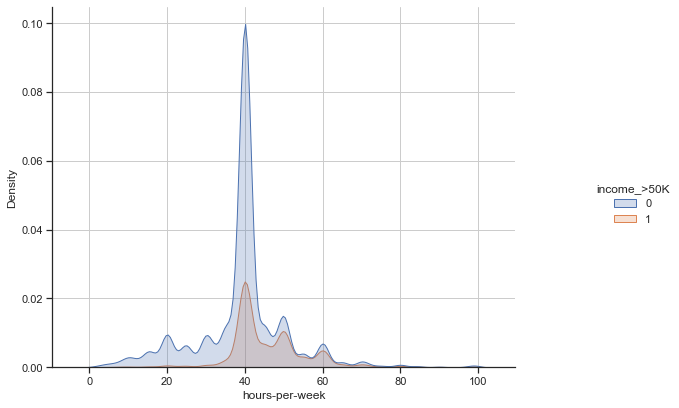

In [14]:
sns.set(style="ticks")
sns.displot(train_df, x='hours-per-week', hue='income_>50K', kind='kde', fill=True).figure.set_size_inches((10,6))
plt.grid()
#train_df.plot.density()

##### hours of work per week, for each gender

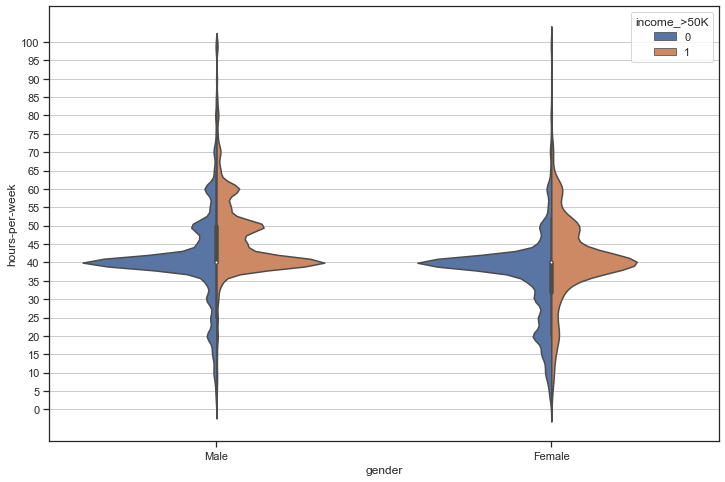

In [15]:
plt.grid()
ax = sns.violinplot(train_df, hue= 'income_>50K', y='hours-per-week',x='gender', split=True) 
ax.figure.set_size_inches((12,8))
tick = ax.set_yticks([i for i in range(0,101,5)])

####  charts of high income groups in native-countris

<AxesSubplot:xlabel='native-country'>

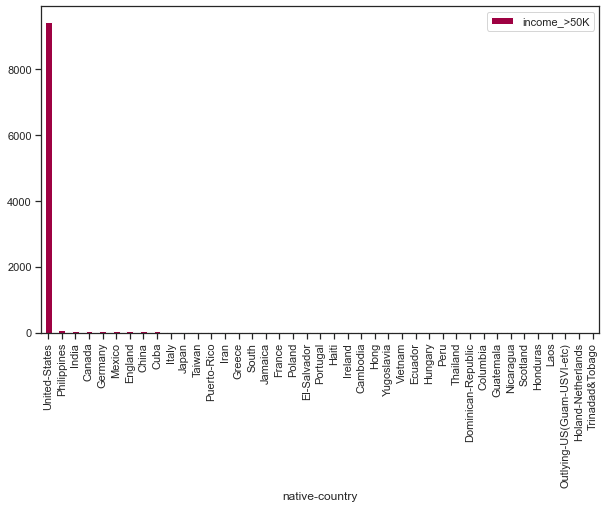

In [16]:
df_draw = pd.DataFrame(train_df[['native-country', 'income_>50K']].groupby(['native-country']).sum().sort_values('income_>50K',ascending=False).copy())
df_draw.plot.bar(cmap = 'Spectral',figsize=(10,6))

as you can see, most of the data belongs to the US

# Encoding categorical features
now that we're done with visualizing, we can convert the categorical features
first of all, we're gonna delete **education**, since the column **education-num** has the same values but ordinal, which gives more information and encoding the former is just a waste of resources
for gender, we're gonna use one-hot encoding (since it has only male and female)

and for the other ones, we're gonna use MCA using [prince package](https://maxhalford.github.io/prince/)

In [17]:
import prince

df = train_df.copy()
df = df.drop('education',axis=1)

df = pd.get_dummies(df,columns=['gender'], drop_first=True)
categories = list(df.select_dtypes(include='object'))
object_df = df[categories]
mca_columns_check = pd.get_dummies(object_df, drop_first=True).columns
non_object_df = df.drop(categories,axis=1)
mca = prince.MCA(3)
mca.fit(object_df)
new_df = mca.transform(object_df).add_prefix("MCA_")
train_df_reduced = pd.concat([new_df,non_object_df],axis=1)
train_df_reduced

,MCA_0,MCA_1,MCA_2,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,gender_Male
0,0.294952,-0.214160,-0.501077,67,366425,16,99999,0,60,1,1
1,0.751943,-0.017551,0.807274,17,244602,8,0,0,15,0,1
2,-0.678412,-0.109119,-0.011524,31,174201,13,0,0,40,1,1
3,-0.693138,-0.110114,-0.267039,58,110199,4,0,0,40,0,1
4,0.937881,0.005617,-0.291226,25,149248,10,0,0,40,0,1
...,...,...,...,...,...,...,...,...,...,...,...
43952,-0.678412,-0.109119,-0.011524,52,68982,13,0,0,50,1,1
43953,0.751943,-0.017551,0.807274,19,116562,9,0,0,40,0,0
43954,0.420793,-0.201346,-0.194820,30,197947,10,0,0,58,0,1
43955,0.451045,-0.109752,0.420133,46,97883,13,0,0,35,0,0


# Feature selection
we're going to detect and remove useless features and select good ones

we're gonna use 2 metrics to detect useless features: f_classif, mutual_info_classif
and see which 3 columns are voted the most to be deleted by these metrics

to use these metrics, we're gonna use SelectKBest function

In [18]:
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.feature_selection import SelectKBest

Y = train_df_reduced['income_>50K']
X = train_df_reduced.drop('income_>50K',axis=1)

number_of_features = len(X.columns)
name_of_features = X.columns
features_to_voteout = 3

selector1 = SelectKBest(score_func = mutual_info_classif,k=number_of_features-features_to_voteout)
selector2 = SelectKBest(score_func = f_classif,k=number_of_features-features_to_voteout)
selectors = [selector1,selector2]
votes = []

for selector in selectors:
    selector.fit(X,Y)
    votes.append(list(set(name_of_features)-set(selector.get_feature_names_out(name_of_features))))
print("votes of mutual_info_classif : ",votes[0])
print("votes of f_classif : ",votes[1])
common_elements = list(set(votes[0]).intersection(set(votes[1])))
if len(common_elements) == 0:
    print("no common element between two votes found, no column will be removed")
else:
    print("remvoing these columns:",common_elements)
    X = X.drop(common_elements,axis=1)
print("final X:")
X

votes of mutual_info_classif :  ['capital-loss', 'fnlwgt', 'gender_Male']
votes of f_classif :  ['MCA_2', 'MCA_1', 'fnlwgt']
remvoing these columns: ['fnlwgt']
final X:


,MCA_0,MCA_1,MCA_2,age,educational-num,capital-gain,capital-loss,hours-per-week,gender_Male
0,0.294952,-0.214160,-0.501077,67,16,99999,0,60,1
1,0.751943,-0.017551,0.807274,17,8,0,0,15,1
2,-0.678412,-0.109119,-0.011524,31,13,0,0,40,1
3,-0.693138,-0.110114,-0.267039,58,4,0,0,40,1
4,0.937881,0.005617,-0.291226,25,10,0,0,40,1
...,...,...,...,...,...,...,...,...,...
43952,-0.678412,-0.109119,-0.011524,52,13,0,0,50,1
43953,0.751943,-0.017551,0.807274,19,9,0,0,40,0
43954,0.420793,-0.201346,-0.194820,30,10,0,0,58,1
43955,0.451045,-0.109752,0.420133,46,13,0,0,35,0


in the code above, the common features between two metrics are voted out of data and now we can proceed to the next step, transforming and normalizing the data

In [19]:
X.describe()

,MCA_0,MCA_1,MCA_2,age,educational-num,capital-gain,capital-loss,hours-per-week,gender_Male
count,4.072700e+04,4.072700e+04,4.072700e+04,40727.000000,40727.000000,40727.000000,40727.000000,40727.000000,40727.000000
mean,7.894532e-17,-1.413165e-17,1.831880e-18,38.521251,10.113512,1118.639944,89.243450,40.908464,0.674982
std,6.143190e-01,5.476024e-01,5.122349e-01,13.243211,2.557084,7639.841297,406.568894,12.014493,0.468387
min,-1.351654e+00,-3.314000e-01,-1.938246e+00,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,-6.160450e-01,-1.435534e-01,-3.042083e-01,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,2.597236e-01,-9.630499e-02,3.807292e-02,37.000000,10.000000,0.000000,0.000000,40.000000,1.000000
75%,5.398537e-01,-4.416149e-02,2.947334e-01,47.000000,13.000000,0.000000,0.000000,45.000000,1.000000
max,1.499807e+00,4.190544e+00,2.277386e+00,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


# Transforming
since we're gonna use multiple models for classifying, we'll have a backup of the data before transformation, just in case (e.g Decision Trees don't need normalized data)

we'll normalize all columns except for MCA_x and gender_Male, and keep 15 percent of the data for testing in the later phases

since we want to use KNN and DTs (or random forest), we will not discretize our features, because they're quite immune against outliers and noise data


In [20]:
columns_to_normalize = ['age','educational-num','capital-gain','capital-loss','hours-per-week']
X_no_transform = X.copy()
X_to_transformed = X.copy()
columns = X_to_transformed[columns_to_normalize]
normalized_df=(columns-columns.min())/(columns.max()-columns.min())
X_transformed = pd.concat([X_to_transformed.drop(columns_to_normalize,axis = 1),normalized_df],axis=1)
X_transformed.describe()


,MCA_0,MCA_1,MCA_2,gender_Male,age,educational-num,capital-gain,capital-loss,hours-per-week
count,4.072700e+04,4.072700e+04,4.072700e+04,40727.000000,40727.000000,40727.000000,40727.000000,40727.000000,40727.000000
mean,7.894532e-17,-1.413165e-17,1.831880e-18,0.674982,0.294812,0.607567,0.011187,0.020487,0.407229
std,6.143190e-01,5.476024e-01,5.122349e-01,0.468387,0.181414,0.170472,0.076399,0.093335,0.122597
min,-1.351654e+00,-3.314000e-01,-1.938246e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.160450e-01,-1.435534e-01,-3.042083e-01,0.000000,0.150685,0.533333,0.000000,0.000000,0.397959
50%,2.597236e-01,-9.630499e-02,3.807292e-02,1.000000,0.273973,0.600000,0.000000,0.000000,0.397959
75%,5.398537e-01,-4.416149e-02,2.947334e-01,1.000000,0.410959,0.800000,0.000000,0.000000,0.448980
max,1.499807e+00,4.190544e+00,2.277386e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
from sklearn.model_selection import train_test_split
test_size = 0.15
X_transformed,X_transformed_test,Y_train,Y_test = train_test_split(X_transformed,Y,test_size=test_size)
X_no_transform,X_no_transform_test= train_test_split(X_no_transform,test_size=test_size)
X.shape,\
Y.shape,\
X_transformed.shape,\
X_no_transform.shape,\
X_transformed_test.shape,\
X_no_transform_test.shape,\
Y_train.shape,\
Y_test.shape

((40727, 9),
 (40727,),
 (34617, 9),
 (34617, 9),
 (6110, 9),
 (6110, 9),
 (34617,),
 (6110,))

# Modeling phase
### baseline
first of all, we're gonna find a baseline for the accuracy of our models

In [22]:
counts = Y.value_counts()
total_count = Y.count()
baselines = Y.value_counts()/total_count
baselines, Y_test.value_counts()/Y_test.count(),Y_train.value_counts()/Y_train.count()

(0    0.752204
 1    0.247796
 Name: income_>50K, dtype: float64,
 0    0.747954
 1    0.252046
 Name: income_>50K, dtype: float64,
 0    0.752954
 1    0.247046
 Name: income_>50K, dtype: float64)

as you can see, we have a baseline of 75% for income_>50K == 0

### preparing our models and CV method
we're gonna train 2 different models for our dataset, a random forest, and a KNN model

#### Random Forest
for random forest, we're gonna use grid search with 5-fold cv

first we're gonna check if a saved model exists in the directory, if it does, we're gonna load it instead of training from scratch and wasting time

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import pickle
forest_file = 'forest.pkl'
is_forest_loaded = None
loaded_forest = None
try:
    with open(forest_file,"rb") as file:
        loaded_forest = pickle.load(file)
except:
    is_forest_loaded=False
else:
    is_forest_loaded=True
is_forest_loaded

True

In [24]:
if not is_forest_loaded:
    ## Actual Values
    grid = { 
        'n_estimators': [i for i in range(100,501,100)],
        'max_features': ['sqrt', 'log2'],
        'max_depth' : [i for i in range(4,25,2)],
        'min_samples_split' : [i for i in range(2,11,2)],
        'min_samples_leaf' : [i for i in range(1,11,2)],
        'criterion' :['gini', 'entropy']
    }
    ## test values for faster search
    # grid = { 
    #     'n_estimators': [i for i in range(100,101,100)],
    #     'max_depth' : [i for i in range(4,7,2)],
    #     'min_samples_split' : [i for i in range(2,5,2)],
    #     'min_samples_leaf' : [i for i in range(1,4,2)],
    #     'criterion' :['gini']
    # }
    forest_estimator = RandomForestClassifier()

    gs_forest = RandomizedSearchCV(forest_estimator,grid,scoring='accuracy',n_jobs=-1,cv=5,n_iter=100)
    gs_forest.fit(X_no_transform,Y_train)
    best_forest = gs_forest.best_estimator_
    print("Best Parameters :",gs_forest.best_params_)
    print("randomized search Score :",(gs_forest.best_score_*100).round(2),'%')
    with open(forest_file,'wb') as file:
        pickle.dump(best_forest,file)
else:
    best_forest = loaded_forest

#### KNN
for KNN, we're gonna use KNeighborClassifier as the model, and grid search with 5-fold for CV

again, we're gonna see if a saved model exists in the directory, if it does, we're gonna load it instead of training

In [25]:
from sklearn.neighbors import KNeighborsClassifier
import pickle
knn_file = 'knn.pkl'
is_knn_loaded = None
try:
    with open(knn_file,"rb") as file:
        loaded_knn = pickle.load(file)
except:
    is_knn_loaded=False
else:
    is_knn_loaded=True
is_knn_loaded

True

In [26]:
if not is_knn_loaded:
    estimator_knn = KNeighborsClassifier(algorithm='auto')
    ## Actual values
    parameters_knn = {
        'n_neighbors': [i for i in range(1,21,1)]
    }

    ## test values for faster search
    # parameters_knn = {
    #     'n_neighbors': [i for i in range(1,21,2)]
    # }

    gs_knn = GridSearchCV(estimator_knn,parameters_knn,scoring = 'accuracy',n_jobs = -1,cv = 5)
    gs_knn.fit(X_transformed,Y_train)
    best_knn = gs_knn.best_estimator_
    print("Best Parameters :",gs_knn.best_params_)
    print("GridSearch Score :",(gs_knn.best_score_*100).round(2),'%')
    with open(knn_file,'wb') as file:
        pickle.dump(best_knn,file)
else:
    best_knn = loaded_knn

now with the models done, we're gonna use the test data we splitted earlier which our models have not seen in the training, to get better and more precise scores for our models

#### Testing
first we're gonna start with the forest and get its scores, we'll also create a confusion matrix for its prediction

forest:
accuracy score: 0.7479541734860884
precision score for class 0: 0.7479541734860884
recall score for class 0: 1.0
fscore score for class 0: 0.8558052434456929
support score for class 0: 4570
precision score for class 1: 0.0
recall score for class 1: 0.0
fscore score for class 1: 0.0
support score for class 1: 1540


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Forest Test Confusion Matrix')

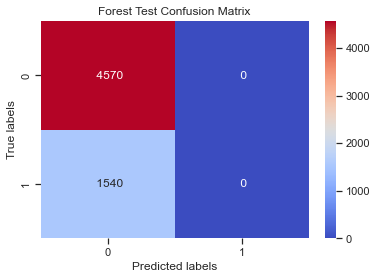

In [27]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support, confusion_matrix

forest_test_predict = best_forest.predict(X_no_transform_test)
forest_test_accuracy = accuracy_score(Y_test,forest_test_predict)
forest_prfs = precision_recall_fscore_support(Y_test,forest_test_predict)
metrics = ['precision','recall','fscore','support']
print('forest:')
print('accuracy score:',forest_test_accuracy)
for class_i in range(2):
    for i,metric in enumerate(metrics):
        print('{0} score for class {1}:'.format(metric,class_i),forest_prfs[i][class_i])

forest_cm = confusion_matrix(Y_test,forest_test_predict)
ax = plt.subplot()
sns.heatmap(forest_cm, cmap='coolwarm',annot=True,fmt = " ", ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Forest Test Confusion Matrix')

now for knn and its scores

K-NN:
accuracy score: 0.8067103109656301
precision score for class 0: 0.8341549990140011
recall score for class 0: 0.925601750547046
fscore score for class 0: 0.8775023337828025
support score for class 0: 4570
precision score for class 1: 0.6727622714148219
recall score for class 1: 0.4538961038961039
fscore score for class 1: 0.5420705699883676
support score for class 1: 1540


Text(0.5, 1.0, 'K-NN Test Confusion Matrix')

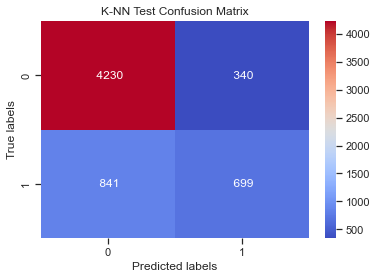

In [28]:
knn_test_predict = best_knn.predict(X_transformed_test)
knn_test_accuracy = accuracy_score(Y_test,knn_test_predict)
knn_prfs = precision_recall_fscore_support(Y_test,knn_test_predict)
metrics = ['precision','recall','fscore','support']
print('K-NN:')
print('accuracy score:',knn_test_accuracy)
for class_i in range(2):
    for i,metric in enumerate(metrics):
        print('{0} score for class {1}:'.format(metric,class_i),knn_prfs[i][class_i])

knn_cm = confusion_matrix(Y_test,knn_test_predict)
ax = plt.subplot()
sns.heatmap(knn_cm, cmap='coolwarm',annot=True,fmt = " ", ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('K-NN Test Confusion Matrix')